<a href="https://colab.research.google.com/github/samhoon000/Zara_Sales_Analysis/blob/main/Zara_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import kagglehub
path = kagglehub.dataset_download("xontoloyo/data-penjualan-zara")

In [37]:
import os
print(os.listdir(path))

['zara.csv']


In [38]:
import pandas as pd

zara_df = pd.read_csv(f"{path}/zara.csv", sep=';')

In [39]:
zara_df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [40]:
zara_df['terms'].unique()

array(['jackets', 'shoes', 'sweaters', 'jeans', 't-shirts'], dtype=object)

In [41]:
zara_df=zara_df.drop(columns=['Product Category','brand','url','sku','description','scraped_at','terms'])

In [42]:
zara_df.head()

,Product ID,Product Position,Promotion,Seasonal,Sales Volume,name,price,currency,section
0,185102,Aisle,No,No,2823,BASIC PUFFER JACKET,19.99,USD,MAN
1,188771,Aisle,No,No,654,TUXEDO JACKET,169.00,USD,MAN
2,180176,End-cap,Yes,Yes,2220,SLIM FIT SUIT JACKET,129.00,USD,MAN
3,112917,Aisle,Yes,Yes,1568,STRETCH SUIT JACKET,129.00,USD,MAN
4,192936,End-cap,No,Yes,2942,DOUBLE FACED JACKET,139.00,USD,MAN


In [43]:
zara_df=zara_df.dropna()

In [44]:
zara_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 0 to 251
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        251 non-null    int64  
 1   Product Position  251 non-null    object 
 2   Promotion         251 non-null    object 
 3   Seasonal          251 non-null    object 
 4   Sales Volume      251 non-null    int64  
 5   name              251 non-null    object 
 6   price             251 non-null    float64
 7   currency          251 non-null    object 
 8   section           251 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 19.6+ KB


In [45]:
zara_df.duplicated().sum()

np.int64(0)

In [46]:
zara_df['Revenue']=zara_df['price']*zara_df['Sales Volume']

In [47]:
zara_df.head()

,Product ID,Product Position,Promotion,Seasonal,Sales Volume,name,price,currency,section,Revenue
0,185102,Aisle,No,No,2823,BASIC PUFFER JACKET,19.99,USD,MAN,56431.77
1,188771,Aisle,No,No,654,TUXEDO JACKET,169.00,USD,MAN,110526.00
2,180176,End-cap,Yes,Yes,2220,SLIM FIT SUIT JACKET,129.00,USD,MAN,286380.00
3,112917,Aisle,Yes,Yes,1568,STRETCH SUIT JACKET,129.00,USD,MAN,202272.00
4,192936,End-cap,No,Yes,2942,DOUBLE FACED JACKET,139.00,USD,MAN,408938.00


# Which section makes the highest profit in Zara?

In [48]:
zara_df.groupby('section')['Revenue'].sum()

,Revenue
section,
MAN,35475561.03
WOMAN,3275813.45


## Based on the above observation MAN section revenue is ~983% higher than WOMAN section revenue

#

# Top 10 product that made the highest profit

In [49]:
zara_df.groupby('name')['Revenue'].sum().sort_values(ascending=False).head(10)

,Revenue
name,
CONTRASTING PATCHES BOMBER JACKET,889308.0
SUIT JACKET IN 100% LINEN,816675.0
FAUX LEATHER BOMBER JACKET,798852.6
PLAID OVERSHIRT,695369.0
RIB COLLAR JACKET,685883.0
SLIM FIT SUIT JACKET,675719.0
POCKET OVERSHIRT,666987.8
VINTAGE EFFECT LEATHER BOMBER JACKET,651521.0
SUEDE JACKET,649140.0


Text(0.5, 1.0, 'Price vs Units Sold')

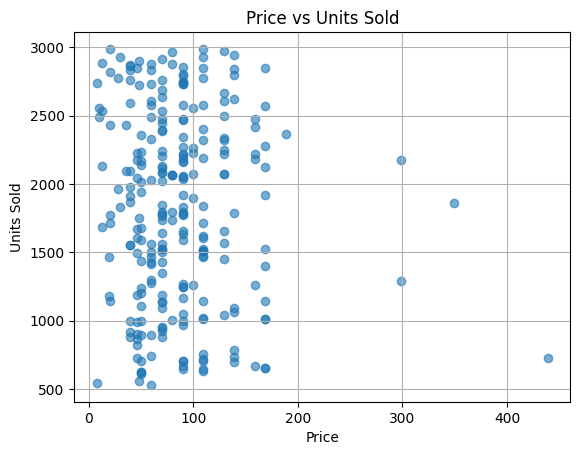

In [50]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(zara_df['price'],zara_df['Sales Volume'],alpha=0.6)
plt.xlabel("Price")
plt.ylabel("Units Sold")
plt.grid(True)
plt.title("Price vs Units Sold")

In [51]:
zara_df.head()

,Product ID,Product Position,Promotion,Seasonal,Sales Volume,name,price,currency,section,Revenue
0,185102,Aisle,No,No,2823,BASIC PUFFER JACKET,19.99,USD,MAN,56431.77
1,188771,Aisle,No,No,654,TUXEDO JACKET,169.00,USD,MAN,110526.00
2,180176,End-cap,Yes,Yes,2220,SLIM FIT SUIT JACKET,129.00,USD,MAN,286380.00
3,112917,Aisle,Yes,Yes,1568,STRETCH SUIT JACKET,129.00,USD,MAN,202272.00
4,192936,End-cap,No,Yes,2942,DOUBLE FACED JACKET,139.00,USD,MAN,408938.00


# Identify which product position earns the most profit

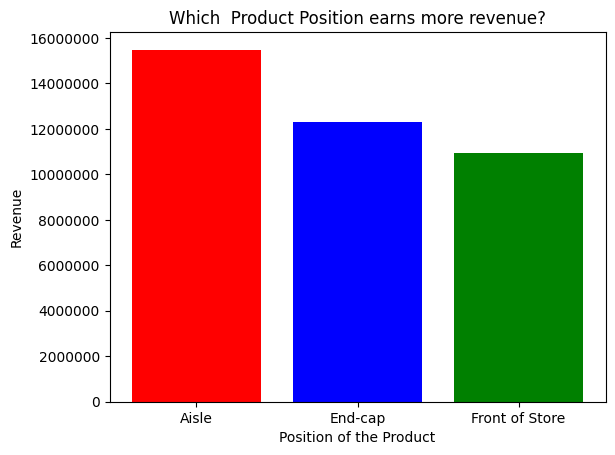

In [52]:
position_revenue=zara_df.groupby('Product Position')['Revenue'].sum()
plt.figure()
plt.bar(position_revenue.index,position_revenue.values,color=['red', 'blue', 'green'])
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Position of the Product")
plt.ylabel("Revenue")
plt.title("Which  Product Position earns more revenue?")
plt.show()

Based on the above bar chart observation we can say that the items placed on the Aisle earns more revenue.

In [53]:
zara_df.head()

,Product ID,Product Position,Promotion,Seasonal,Sales Volume,name,price,currency,section,Revenue
0,185102,Aisle,No,No,2823,BASIC PUFFER JACKET,19.99,USD,MAN,56431.77
1,188771,Aisle,No,No,654,TUXEDO JACKET,169.00,USD,MAN,110526.00
2,180176,End-cap,Yes,Yes,2220,SLIM FIT SUIT JACKET,129.00,USD,MAN,286380.00
3,112917,Aisle,Yes,Yes,1568,STRETCH SUIT JACKET,129.00,USD,MAN,202272.00
4,192936,End-cap,No,Yes,2942,DOUBLE FACED JACKET,139.00,USD,MAN,408938.00


#Does the products which are advertised earn more revenue?

In [54]:
revenue_advertise=zara_df.groupby('Promotion')['Revenue'].sum()

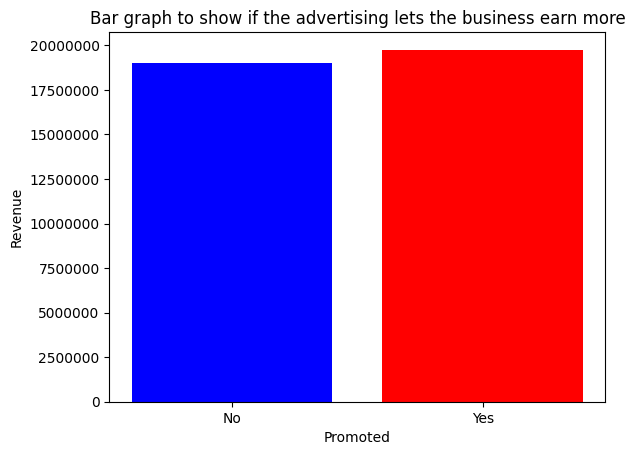

In [55]:
plt.figure()
plt.bar(revenue_advertise.index,revenue_advertise.values,color=['blue','red'])
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel("Promoted")
plt.ylabel("Revenue")
plt.title("Bar graph to show if the advertising lets the business earn more")
plt.show()


#Does seasonal product outperform the nonseasonal ones?

In [56]:
seasonal_revenue=zara_df.groupby('Seasonal')['Revenue'].sum()

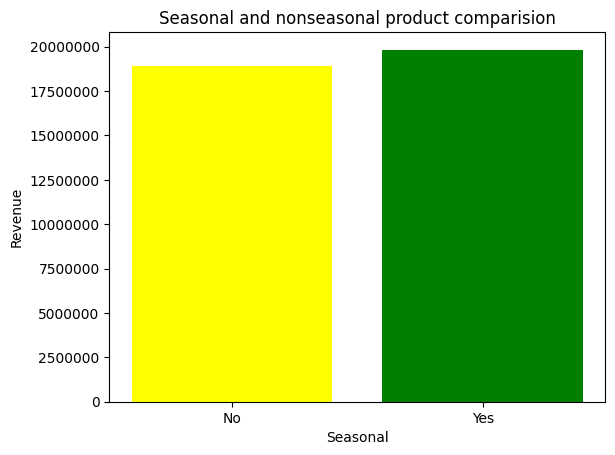

In [57]:
plt.figure()
plt.bar(seasonal_revenue.index,seasonal_revenue.values,color=['yellow','green'])
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('Seasonal')
plt.ylabel("Revenue")
plt.title("Seasonal and nonseasonal product comparision")
plt.show()